In [1]:
# Van Krevelen Diagrams to Help Visual Differences Between Size Fractions and Temporal Behaviors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle
%matplotlib inline

In [2]:
# FTICR-MS DATA FILE
FT_data = pd.read_excel("WC_EXT_Summary.xlsx")
#FT_data2 = pd.read_excel("WC_EXT_OX_Summary.xlsx")
#FT_data3 = pd.read_excel("WC_EXT_AN_Summary.xlsx")

In [3]:
FT_data.columns

Index(['Mass', 'C', 'H', 'O', 'N', 'C13', 'S', 'P', 'Na', 'El_comp', 'Class',
       'NeutralMass', 'Error_ppm', 'Candidates', 'WC_EXT_1_t0_L_r1',
       'WC_EXT_1_t0_L_r2', 'WC_EXT_1_t0_M_r1', 'WC_EXT_1_t0_M_r2',
       'WC_EXT_1_t0_S_r1', 'WC_EXT_1_t0_S_r2', 'WC_EXT_2_t0_L_r1',
       'WC_EXT_2_t0_L_r2', 'WC_EXT_2_t0_M_r1', 'WC_EXT_2_t0_M_r2',
       'WC_EXT_2_t0_S_r1', 'WC_EXT_2_t0_S_r2', 'WC_EXT_3_t0_L_r1',
       'WC_EXT_3_t0_L_r2', 'WC_EXT_3_t0_M_r1', 'WC_EXT_3_t0_M_r2',
       'WC_EXT_3_t0_S_r1', 'WC_EXT_3_t0_S_r2', 'kmd', 'mf', 'dbe', 'nosp',
       'nosc', 'gibbs', 'ai', 'ai_mod', 'z-class', 'cho-ind', 'class'],
      dtype='object')

In [4]:
# Using colors assigned on https://msc-viz.emsl.pnnl.gov/fticr.html
cdic = {'AminoSugar' : 'blue',
        'Carb' : 'tab:orange',
        'ConHC' : 'green',
        'Lignin': 'tab:red',
        'Lipid' : 'magenta',
        'Other' : 'tab:brown',
        'Protein' : 'tab:pink',
        'Tannin' : 'tab:gray',
        'UnsatHC' : 'yellow'}

# Mapping Classes to Colors 
FT_data['Color'] = FT_data['Class'].map(cdic)
FT_data['H:C'] = FT_data['H'] / FT_data['C']
FT_data['O:C'] = FT_data['O'] / FT_data['C']

# FT_data2['Color'] = FT_data2['Class'].map(cdic)
# FT_data2['H:C'] = FT_data2['H'] / FT_data2['C']
# FT_data2['O:C'] = FT_data2['O'] / FT_data2['C']

# FT_data3['Color'] = FT_data3['Class'].map(cdic)
# FT_data3['H:C'] = FT_data3['H'] / FT_data3['C']
# FT_data3['O:C'] = FT_data3['O'] / FT_data3['C']

In [5]:
FT_data.columns

Index(['Mass', 'C', 'H', 'O', 'N', 'C13', 'S', 'P', 'Na', 'El_comp', 'Class',
       'NeutralMass', 'Error_ppm', 'Candidates', 'WC_EXT_1_t0_L_r1',
       'WC_EXT_1_t0_L_r2', 'WC_EXT_1_t0_M_r1', 'WC_EXT_1_t0_M_r2',
       'WC_EXT_1_t0_S_r1', 'WC_EXT_1_t0_S_r2', 'WC_EXT_2_t0_L_r1',
       'WC_EXT_2_t0_L_r2', 'WC_EXT_2_t0_M_r1', 'WC_EXT_2_t0_M_r2',
       'WC_EXT_2_t0_S_r1', 'WC_EXT_2_t0_S_r2', 'WC_EXT_3_t0_L_r1',
       'WC_EXT_3_t0_L_r2', 'WC_EXT_3_t0_M_r1', 'WC_EXT_3_t0_M_r2',
       'WC_EXT_3_t0_S_r1', 'WC_EXT_3_t0_S_r2', 'kmd', 'mf', 'dbe', 'nosp',
       'nosc', 'gibbs', 'ai', 'ai_mod', 'z-class', 'cho-ind', 'class', 'Color',
       'H:C', 'O:C'],
      dtype='object')

In [6]:
## Define SampleNames for each of the Size Fractions ##
# Large Size Fraction
L_sample_name_r1 = 'WC_EXT_1_t0_L_r1'
L_sample_name_r2 = 'WC_EXT_1_t0_L_r2'

# Medium Size Fraction
M_sample_name_r1 = 'WC_EXT_1_t0_M_r1'
M_sample_name_r2 = 'WC_EXT_1_t0_M_r2'

# Small Size Fraction
S_sample_name_r1 = 'WC_EXT_1_t0_S_r1'
S_sample_name_r2 = 'WC_EXT_1_t0_S_r2'

# Create DataFrames for each size fraction L, M, S
L_r1 = FT_data[[L_sample_name_r1, 'Class', 'H:C', 'O:C','Color']]
L_r1 = L_r1[L_r1[L_sample_name_r1] > 0.0]
L_r1 = L_r1.rename(columns = { L_sample_name_r1 : 'Large_r1'})

L_r2 = FT_data[[L_sample_name_r2, 'Class', 'H:C', 'O:C','Color']]
L_r2 = L_r2[L_r2[L_sample_name_r2] > 0.0]
L_r2 = L_r2.rename(columns = { L_sample_name_r2 : 'Large_r2'})

M_r1 = FT_data[[M_sample_name_r1, 'Class', 'H:C', 'O:C','Color']]
M_r1 = M_r1[M_r1[M_sample_name_r1] > 0.0]
M_r1 = M_r1.rename(columns = { M_sample_name_r1 : 'Medium_r1'})

M_r2 = FT_data[[M_sample_name_r2, 'Class', 'H:C', 'O:C','Color']]
M_r2 = M_r2[M_r2[M_sample_name_r2] > 0.0]
M_r2 = M_r2.rename(columns = { M_sample_name_r2 : 'Medium_r2'})

S_r1 = FT_data[[S_sample_name_r1, 'Class', 'H:C', 'O:C','Color']]
S_r1 = S_r1[S_r1[S_sample_name_r1] > 0.0]
S_r1 = S_r1.rename(columns = { S_sample_name_r1 : 'Small_r1'})

S_r2 = FT_data[[S_sample_name_r2, 'Class', 'H:C', 'O:C','Color']]
S_r2 = S_r2[S_r2[S_sample_name_r2] > 0.0]
S_r2 = S_r2.rename(columns = { S_sample_name_r2 : 'Small_r2'})


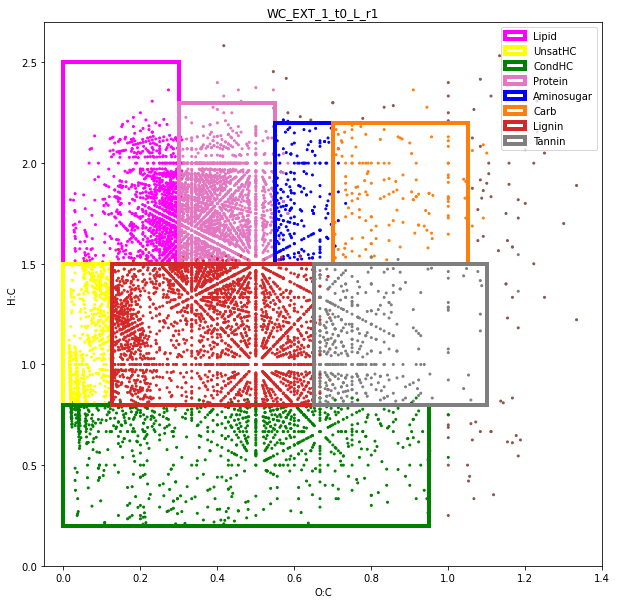

In [7]:
# Large Size Fraction
ax = L_r1.plot.scatter(x = 'O:C', y='H:C', c = 'Color', s = 4, figsize = (10,10))

# Class Boundaries
# Lipid O:C [0 - 0.3]; H:C [1.5 - 2.5]
ax.add_patch( Rectangle((0,1.5), 0.3, 1, fc = 'none', color = 'magenta', label = 'Lipid',linewidth = 4))

# unsatHC O:C [0 - 0.125]; H:C [0.8 - 1.5]
ax.add_patch( Rectangle((0,0.8), 0.125, 0.7, fc = 'none', color = 'yellow', label = 'UnsatHC',  linewidth = 4))

# condHC O:C [0 - 0.95]; H:C [0.2 - 0.8]
ax.add_patch( Rectangle((0,0.2), 0.95, 0.6, fc = 'none', color = 'green', label = 'CondHC', linewidth = 4))

# Protein O:C [0.3 - 0.55]; H:C [1.5 - 2.3]
ax.add_patch( Rectangle((0.3,1.5), 0.25, 0.8, fc = 'none', color = 'tab:pink', label = 'Protein', linewidth = 4))

# Aminosugar O:C [0.55 - 0.7]; H:C [1.5 - 2.2]
ax.add_patch( Rectangle((0.55, 1.5), 0.15, 0.7, fc = 'none', color = 'blue', label = 'Aminosugar', linewidth = 4))

# Carb O:C [0.7 - 1.05]; H:C [1.5 - 2.2]
ax.add_patch( Rectangle((0.7, 1.5), 0.35, 0.7, fc = 'none', color = 'tab:orange', label = 'Carb', linewidth = 4))

# Lignin O:C [0.125 - 0.65]; H:C [0.8 - 1.5]
ax.add_patch( Rectangle((0.125, 0.8), 0.525, 0.7, fc = 'none', color = 'tab:red', label = 'Lignin', linewidth = 4))

# Tannin O:C [0.65 - 1.1]; H:C [0.8 - 1.5]
ax.add_patch( Rectangle((0.65, 0.8), 0.45, 0.7, fc = 'none', color = 'tab:gray',label = 'Tannin', linewidth = 4))

# centers_x = [0.15,0.0635,0.475,0.425,0.625,0.875,0.3875,0.875]
# centers_y= [2,1.15,0.5,1.9,1.85,1.85,1.15,1.15]
# plt.scatter(centers_x, centers_y, s=100, color = 'black')

plt.title(L_sample_name_r1)
plt.xlim([-0.05,1.4])
plt.ylim([0,2.7])
plt.legend()
plt.show()

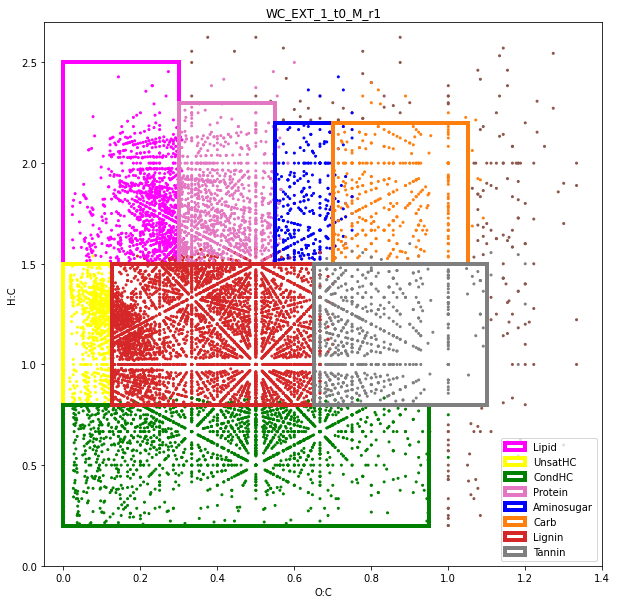

In [8]:
# Medium Size Fraction
ax = M_r1.plot.scatter(x = 'O:C', y='H:C', c = 'Color', s = 4, figsize = (10,10))

# Class Boundaries
# Lipid O:C [0 - 0.3]; H:C [1.5 - 2.5]
ax.add_patch( Rectangle((0,1.5), 0.3, 1, fc = 'none', color = 'magenta', label = 'Lipid',linewidth = 4))

# unsatHC O:C [0 - 0.125]; H:C [0.8 - 1.5]
ax.add_patch( Rectangle((0,0.8), 0.125, 0.7, fc = 'none', color = 'yellow', label = 'UnsatHC',  linewidth = 4))

# condHC O:C [0 - 0.95]; H:C [0.2 - 0.8]
ax.add_patch( Rectangle((0,0.2), 0.95, 0.6, fc = 'none', color = 'green', label = 'CondHC', linewidth = 4))

# Protein O:C [0.3 - 0.55]; H:C [1.5 - 2.3]
ax.add_patch( Rectangle((0.3,1.5), 0.25, 0.8, fc = 'none', color = 'tab:pink', label = 'Protein', linewidth = 4))

# Aminosugar O:C [0.55 - 0.7]; H:C [1.5 - 2.2]
ax.add_patch( Rectangle((0.55, 1.5), 0.15, 0.7, fc = 'none', color = 'blue', label = 'Aminosugar', linewidth = 4))

# Carb O:C [0.7 - 1.05]; H:C [1.5 - 2.2]
ax.add_patch( Rectangle((0.7, 1.5), 0.35, 0.7, fc = 'none', color = 'tab:orange', label = 'Carb', linewidth = 4))

# Lignin O:C [0.125 - 0.65]; H:C [0.8 - 1.5]
ax.add_patch( Rectangle((0.125, 0.8), 0.525, 0.7, fc = 'none', color = 'tab:red', label = 'Lignin', linewidth = 4))

# Tannin O:C [0.65 - 1.1]; H:C [0.8 - 1.5]
ax.add_patch( Rectangle((0.65, 0.8), 0.45, 0.7, fc = 'none', color = 'tab:gray',label = 'Tannin', linewidth = 4))

plt.title(M_sample_name_r1)
plt.xlim([-0.05,1.4])
plt.ylim([0,2.7])
plt.legend()
plt.show()

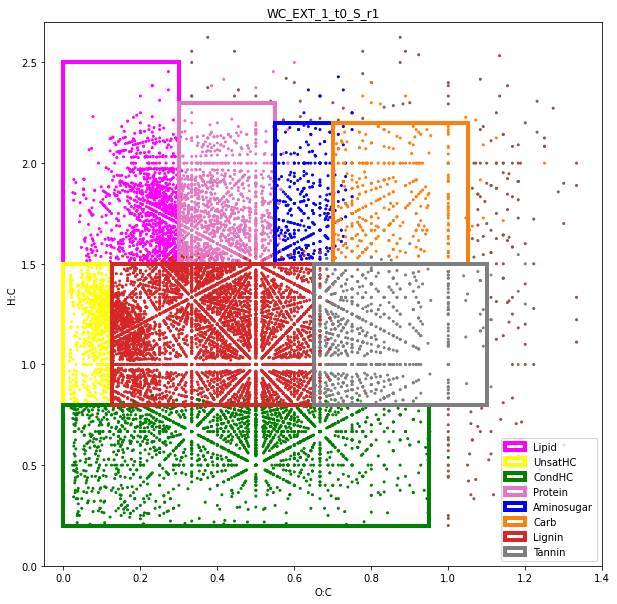

In [9]:
# Small Size Fraction
ax =S_r1.plot.scatter(x = 'O:C', y='H:C', c = 'Color', s = 4, figsize = (10,10))

# Class Boundaries
# Lipid O:C [0 - 0.3]; H:C [1.5 - 2.5]
ax.add_patch( Rectangle((0,1.5), 0.3, 1, fc = 'none', color = 'magenta', label = 'Lipid',linewidth = 4))

# unsatHC O:C [0 - 0.125]; H:C [0.8 - 1.5]
ax.add_patch( Rectangle((0,0.8), 0.125, 0.7, fc = 'none', color = 'yellow', label = 'UnsatHC',  linewidth = 4))

# condHC O:C [0 - 0.95]; H:C [0.2 - 0.8]
ax.add_patch( Rectangle((0,0.2), 0.95, 0.6, fc = 'none', color = 'green', label = 'CondHC', linewidth = 4))

# Protein O:C [0.3 - 0.55]; H:C [1.5 - 2.3]
ax.add_patch( Rectangle((0.3,1.5), 0.25, 0.8, fc = 'none', color = 'tab:pink', label = 'Protein', linewidth = 4))

# Aminosugar O:C [0.55 - 0.7]; H:C [1.5 - 2.2]
ax.add_patch( Rectangle((0.55, 1.5), 0.15, 0.7, fc = 'none', color = 'blue', label = 'Aminosugar', linewidth = 4))

# Carb O:C [0.7 - 1.05]; H:C [1.5 - 2.2]
ax.add_patch( Rectangle((0.7, 1.5), 0.35, 0.7, fc = 'none', color = 'tab:orange', label = 'Carb', linewidth = 4))

# Lignin O:C [0.125 - 0.65]; H:C [0.8 - 1.5]
ax.add_patch( Rectangle((0.125, 0.8), 0.525, 0.7, fc = 'none', color = 'tab:red', label = 'Lignin', linewidth = 4))

# Tannin O:C [0.65 - 1.1]; H:C [0.8 - 1.5]
ax.add_patch( Rectangle((0.65, 0.8), 0.45, 0.7, fc = 'none', color = 'tab:gray',label = 'Tannin', linewidth = 4))

plt.title(S_sample_name_r1)
plt.xlim([-0.05,1.4])
plt.ylim([0,2.7])
plt.legend()
plt.show()

In [10]:
fL_r1 = pd.DataFrame({"sample": [L_sample_name_r1]})
fL_r2 = pd.DataFrame({"sample": [L_sample_name_r2]})


fM_r1 = pd.DataFrame({"sample": [M_sample_name_r1]})
fM_r2 = pd.DataFrame({"sample": [M_sample_name_r2]})

fS_r1 = pd.DataFrame({"sample": [S_sample_name_r1]})
fS_r2 = pd.DataFrame({"sample": [S_sample_name_r2]})

for items in cdic.keys():
    fcheck = L_r1[L_r1.Class == items].Large_r1.sum() / L_r1['Large_r1'].sum()
    fL_r1[items] = fcheck
    fcheck_r2 = L_r2[L_r2.Class == items].Large_r2.sum() / L_r2['Large_r2'].sum()
    fL_r2[items] = fcheck_r2
fL = pd.concat([fL_r1,fL_r2])

fcheck = []
fcheck2 = []
for items in cdic.keys():
    fcheck = M_r1[M_r1.Class == items].Medium_r1.sum() / M_r1['Medium_r1'].sum()
    fM_r1[items] = fcheck
    fcheck_r2 = M_r2[M_r2.Class == items].Medium_r2.sum() / M_r2['Medium_r2'].sum()
    fM_r2[items] = fcheck_r2
    
fM = pd.concat([fM_r1,fM_r2])

fcheck = []
fcheck2 = [] 
for items in cdic.keys():
    fcheck = S_r1[S_r1.Class == items].Small_r1.sum() / S_r1['Small_r1'].sum()
    fS_r1[items] = fcheck
    fcheck_r2 = S_r2[S_r2.Class == items].Small_r2.sum() / S_r2['Small_r2'].sum()
    fS_r2[items] = fcheck_r2
fS = pd.concat([fS_r1,fS_r2])

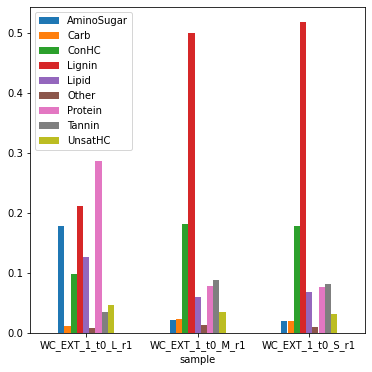

In [11]:
# Plotting Across Size Fractions
f=pd.concat([fL,fM,fS])
f2=pd.concat([fL_r1,fM_r1,fS_r1])
f2.set_index("sample", inplace=True)
ax=f2.plot.bar(rot=0, figsize = (6,6))

sample  AminoSugar      Carb     ConHC    Lignin     Lipid  \
0  WC_EXT_1_t0_L_r1    0.178391  0.011490  0.098353  0.211308  0.126077   
0  WC_EXT_1_t0_L_r2    0.172206  0.013390  0.102417  0.227049  0.104131   
0  WC_EXT_1_t0_M_r1    0.021330  0.022635  0.181535  0.500042  0.059744   
0  WC_EXT_1_t0_M_r2    0.019777  0.021164  0.195234  0.497764  0.055818   
0  WC_EXT_1_t0_S_r1    0.019784  0.019028  0.177311  0.517124  0.067605   
0  WC_EXT_1_t0_S_r2    0.020134  0.018212  0.181157  0.516017  0.067746   

      Other   Protein    Tannin   UnsatHC  
0  0.007588  0.285849  0.034440  0.046505  
0  0.009640  0.288047  0.036518  0.046602  
0  0.012809  0.078881  0.087785  0.035239  
0  0.013560  0.075025  0.088962  0.032696  
0  0.010549  0.075793  0.082048  0.030758  
0  0.010418  0.075000  0.082396  0.028920

Text(0.5, 1.0, 'WC_EXT_OX_t1_Small')

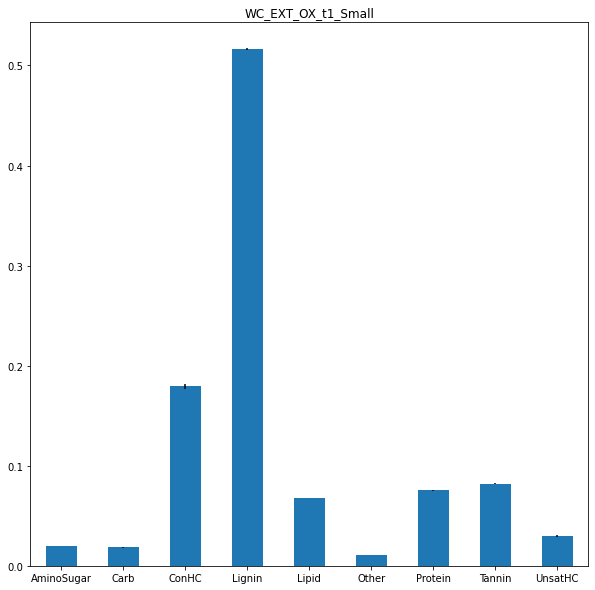

In [13]:
#f.set_index("sample", inplace=True)
# ax=f.plot.bar(rot=0, figsize = (10,10))
favg = fS.iloc[:,1::].mean()
fstd = fS.iloc[:,1::].std()
ax=favg.plot.bar(rot=0, figsize = (10,10), yerr= fstd)
plt.title('WC_EXT_OX_t1_Small')

In [14]:
favg.round(3)*100, fstd.round(4)*100


(AminoSugar     2.0
 Carb           1.9
 ConHC         17.9
 Lignin        51.7
 Lipid          6.8
 Other          1.0
 Protein        7.5
 Tannin         8.2
 UnsatHC        3.0
 dtype: float64,
 AminoSugar    0.02
 Carb          0.06
 ConHC         0.27
 Lignin        0.08
 Lipid         0.01
 Other         0.01
 Protein       0.06
 Tannin        0.02
 UnsatHC       0.13
 dtype: float64)